<a href="https://colab.research.google.com/gist/Develop-It-19/a6c153e223ef7f87c1124f56cf26a4a4/dl_2019_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies and Create Databunch

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [91]:
path = untar_data(URLs.MNIST)
path

PosixPath('/root/.fastai/data/mnist_png')

In [92]:
!ls {path}

models	testing  training


In [93]:
!ls {path}/'training'

0  1  2  3  4  5  6  7	8  9


In [94]:
!ls {path}/'testing'

0  1  2  3  4  5  6  7	8  9


In [0]:
il = ImageList.from_folder(path, convert_mode = 'L')

In [96]:
il.items[0]

PosixPath('/root/.fastai/data/mnist_png/training/3/20800.png')

In [97]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png

In [0]:
defaults.cmap = 'binary'

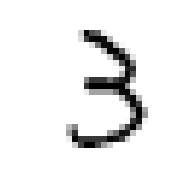

In [99]:
il[0].show()

In [0]:
sd = il.split_by_folder(train = 'training', valid = 'testing')

In [101]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Test: None

In [102]:
(path/'training').ls()

[PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/7')]

In [0]:
ll = sd.label_from_folder()

In [104]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png;

Test: None

In [0]:
x, y = ll.train[0]

3 torch.Size([1, 28, 28])


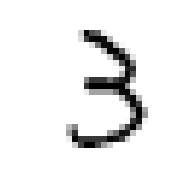

In [106]:
x.show()
print(y, x.shape)

In [0]:
tfms = ([*rand_pad(padding = 3, size = 28, mode = 'zeros')], [])

In [0]:
ll = ll.transform(tfms)

In [0]:
bs = 128

In [0]:
data = ll.databunch(bs = bs).normalize()

In [0]:
x, y = data.train_ds[0]

3 torch.Size([1, 28, 28])


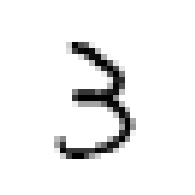

In [112]:
x.show()
print(y, x.shape)

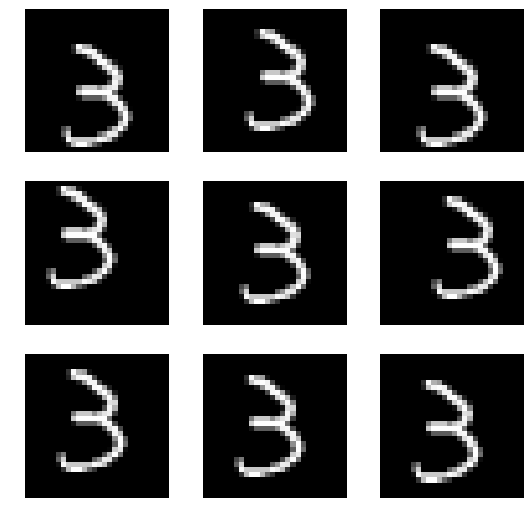

In [113]:
def _plot(i, j, ax):
  data.train_ds[0][0].show(ax, cmap = 'gray')
plot_multi(_plot, 3, 3, figsize = (9, 9))

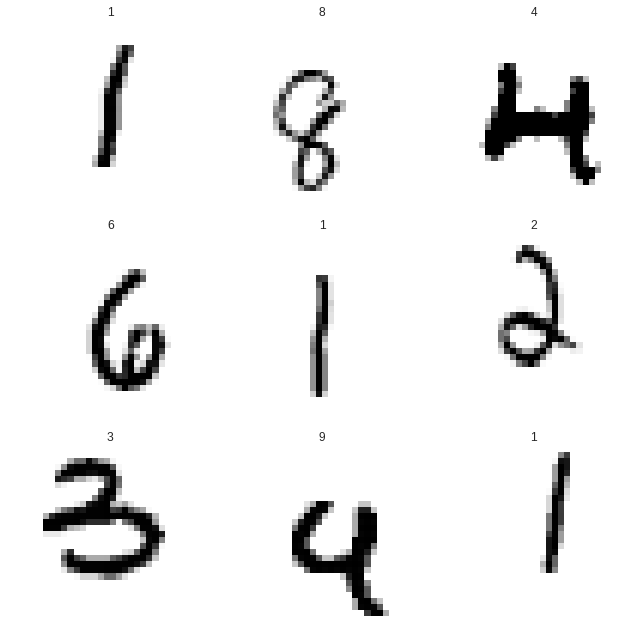

In [114]:
data.show_batch(rows = 3, figsize = (9, 9))

In [115]:
xb, yb = data.one_batch()
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

# Model Building, Training and Testing.

In [0]:
def conv(ni, nf):
	return nn.Conv2d(ni, nf, kernel_size = 3, stride = 2, padding = 1)

In [0]:
#Initial Image size 1 x 28 x 28
model = nn.Sequential(
	conv(1, 8), #size of output 8 x 14 x 14
	nn.BatchNorm2d(8),
	nn.ReLU(),
	conv(8, 16), #size of output 16 x 7 x 7
	nn.BatchNorm2d(16),
	nn.ReLU(),
	conv(16, 32), #size of output 32 x 4 x 4
	nn.BatchNorm2d(32),
	nn.ReLU(),
	conv(32, 16), #size of output 16 x 2 x 2
	nn.BatchNorm2d(16),
	nn.ReLU(),
	conv(16, 10), #size of output 10 x 1 x 1
	nn.BatchNorm2d(10),
	Flatten() 	#Removes 1 x 1 grid
	)

In [0]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [119]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [1, 8, 14, 14]       80         True      
______________________________________________________________________
BatchNorm2d          [1, 8, 14, 14]       16         True      
______________________________________________________________________
ReLU                 [1, 8, 14, 14]       0          False     
______________________________________________________________________
Conv2d               [1, 16, 7, 7]        1,168      True      
______________________________________________________________________
BatchNorm2d          [1, 16, 7, 7]        32         True      
______________________________________________________________________
ReLU                 [1, 16, 7, 7]        0          False     
______________________________________________________________________
Conv2d               [1, 32, 4, 4]        4,640      True      
______________________________________________________________

In [0]:
#xb = xb.cuda()

In [121]:
model(xb).shape
	#Any PyTorch Module we can pretend as a function.
	#Check the Output shape.

torch.Size([128, 10])

In [122]:
learn.lr_find(end_lr = 100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


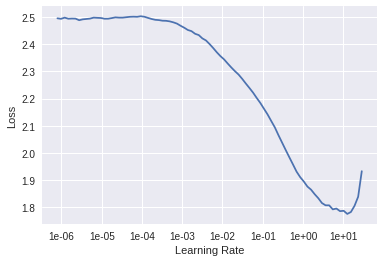

In [123]:
learn.recorder.plot()

In [124]:
learn.fit_one_cycle(10, max_lr = 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.219880,0.175714,0.945200,00:40
1,0.180830,0.178993,0.942500,00:40
2,0.163934,0.183012,0.941200,00:40
3,0.129355,0.105281,0.965300,00:41
4,0.109715,0.183049,0.941900,00:40
5,0.095002,0.077882,0.975600,00:40
6,0.082391,0.051353,0.983200,00:40
7,0.062492,0.038718,0.988400,00:40
8,0.049674,0.031636,0.990100,00:40
9,0.046364,0.028814,0.990000,00:40


In [0]:
def conv2(ni, nf):
	return conv_layer(ni, nf, stride = 2)

In [0]:
model2 = nn.Sequential(
	conv2(1, 8),
	conv2(8, 16),
	conv2(16, 32),
	conv2(32, 16),
	conv2(16, 10),
	Flatten()
	)

In [0]:
learn2 = Learner(data, model2, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [128]:
learn2.fit_one_cycle(10, max_lr = 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.234447,0.273027,0.913200,00:40
1,0.192211,0.245249,0.921400,00:40
2,0.166312,0.299438,0.897800,00:40
3,0.135279,0.226379,0.933900,00:40
4,0.119406,0.077284,0.975800,00:40
5,0.106587,0.092221,0.971800,00:40
6,0.091173,0.049426,0.984100,00:42
7,0.065166,0.040378,0.986800,00:41
8,0.047844,0.029194,0.990400,00:42
9,0.044007,0.028050,0.990800,00:41


# ResNets for Training and Testing.

In [0]:
modelRes = nn.Sequential(
	conv2(1, 8),
	res_block(8),
	conv2(8, 16),
	res_block(16),
	conv2(16, 32),
	res_block(32),
	conv2(32, 16),
	res_block(16),
	conv2(16, 10),
	Flatten()
	)

In [0]:
#Refactor
def conv_and_res(ni, nf):
	return nn.Sequential(conv2(ni, nf), res_block(nf))


In [0]:
modelRes = nn.Sequential(
	conv_and_res(1, 8),
	conv_and_res(8, 16),
	conv_and_res(16, 32),
	conv_and_res(32, 16),
	conv2(16, 10),
	Flatten()
	)


In [0]:
learnRes = Learner(data, modelRes, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


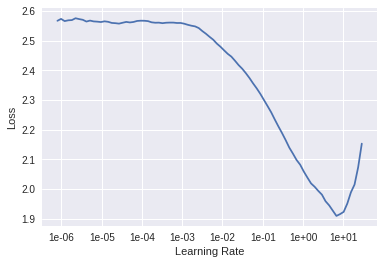

In [133]:
learnRes.lr_find(end_lr = 100)

learnRes.recorder.plot()

In [134]:
learnRes.fit_one_cycle(15, max_lr = 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.173565,0.311417,0.909300,01:07
1,0.131300,0.304989,0.915200,01:07
2,0.120990,0.289570,0.920400,01:07
3,0.103697,0.091241,0.969700,01:07
4,0.090706,0.130628,0.964400,01:07
5,0.094174,0.126116,0.962400,01:07
6,0.073929,0.220171,0.929200,01:08
7,0.068675,0.053188,0.983300,01:08
8,0.059054,0.085659,0.973800,01:08
9,0.052948,0.040999,0.985300,01:07


In [0]:
#We have Achieved an Accuracy of 99.52%